In [36]:
import os
os.chdir('..')
from visual import config
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


### **Remove nan values**

In [71]:
## 01, 04, 16 for visualization in paper 
idx = '03'
path_as = config.root_proj + '/data/dset/s1_ascend/scene'+ idx + '_s1as.tif'
path_des = config.root_proj + '/data/dset/s1_descend/scene' + idx + '_s1des.tif'
# path_s2 = config.root_proj + '/data/dset/s2_img/s2_scene' + idx + '_img.tif' 
path_truth = config.root_proj + '/data/dset/s1_truth/scene' + idx + '_wat_truth.tif'
path_as


'/home/yons/Desktop/developer-luo/Monthly-Surface-Water-in-Tibet/data/dset/s1_ascend/scene03_s1as.tif'

In [101]:
s1_as, s1_as_info = readTiff(path_as)
s1_des, s1_des_info = readTiff(path_des)
# s2_img, s2_info = readTiff(path_s2)
truth, truth_info = readTiff(path_truth)
scene = np.concatenate((s1_as, s1_des), axis=-1)


ascending: -100.0 25.980764
descending: -100.0 19.3189


In [96]:
## check if the nan value exists.
print('ascending:', s1_as.min(), s1_as.max())
print('descending:', s1_des.min(), s1_des.max())


ascending: nan nan
descending: nan nan


In [97]:
## convert nan value to -100
s1_as[np.isnan(s1_as)] = -100
s1_des[np.isnan(s1_des)] = -100


In [98]:
## check if the nan value exists.
print('ascending:', s1_as.min(), s1_as.max())
print('descending:', s1_des.min(), s1_des.max())


ascending: -100.0 25.980763612721578
descending: -100.0 19.318899578903775


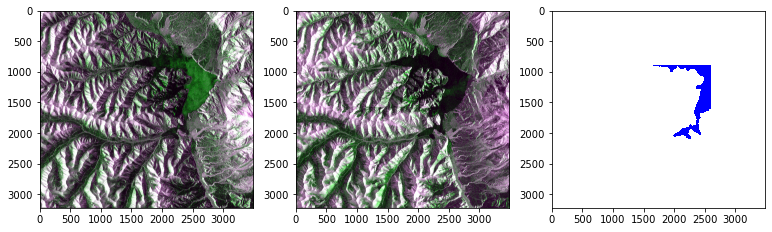

In [99]:
### check the scene and the truth
colors = ['white', 'blue']
cmap = mpl.colors.ListedColormap(colors)

plt.figure(figsize=(13,6))
plt.subplot(1,3,1)
imgShow(s1_as, color_bands=(1,0,1), clip_percent=5, per_band_clip='True')
plt.subplot(1,3,2)
imgShow(s1_des, color_bands=(1,0,1), clip_percent=5, per_band_clip='True')
plt.subplot(1,3,3)
plt.imshow(truth, cmap=cmap)
# plt.subplot(1,3,3)
# imgShow(s2_img)


In [100]:
### write out
## ascending
writeTiff(im_data = s1_as, 
    im_geotrans = s1_as_info['geotrans'], 
    im_geosrs = s1_as_info['geosrs'], 
    path_out = path_as)

## descending
writeTiff(im_data = s1_des, 
    im_geotrans = s1_des_info['geotrans'], 
    im_geosrs = s1_des_info['geosrs'], 
    path_out = path_des)

